In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested
from phe import *
from phe import map_data as phe_map_data, latest_changes
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
1,702 cases (7 day average) as of Thu 13 May, -150.0 since Wed 12 May
77 hospitalised (7 day average) as of Sat 15 May, -4.1 since Wed 12 May
7 died (7 day average) as of Thu 13 May, -0.3 since Wed 12 May


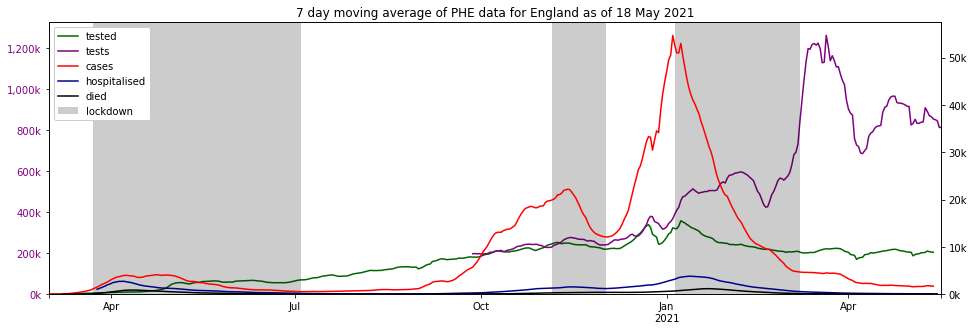

In [3]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

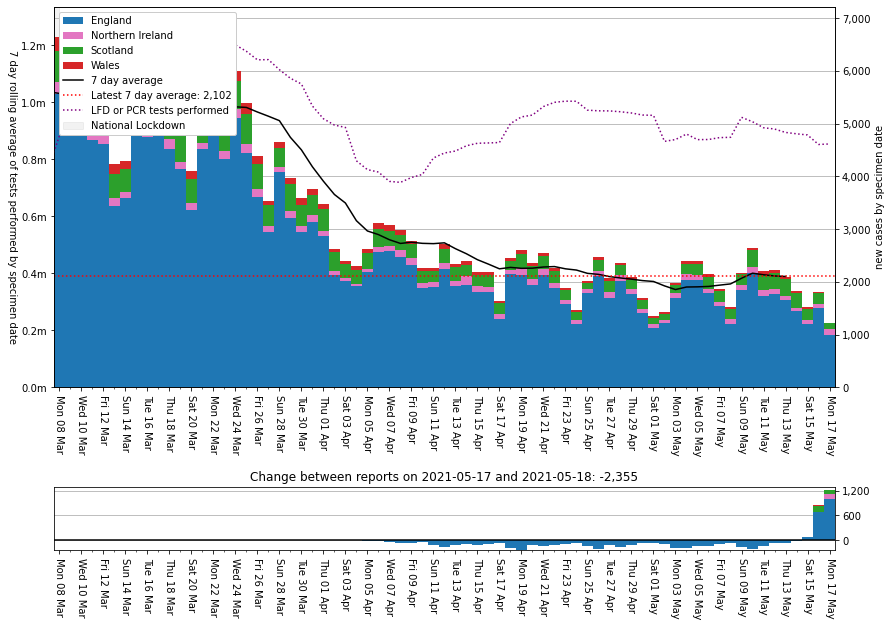

In [4]:
plot_areas(for_date, 'cases_nations', earliest=lockdown3[1], date_format='%a %d %b')

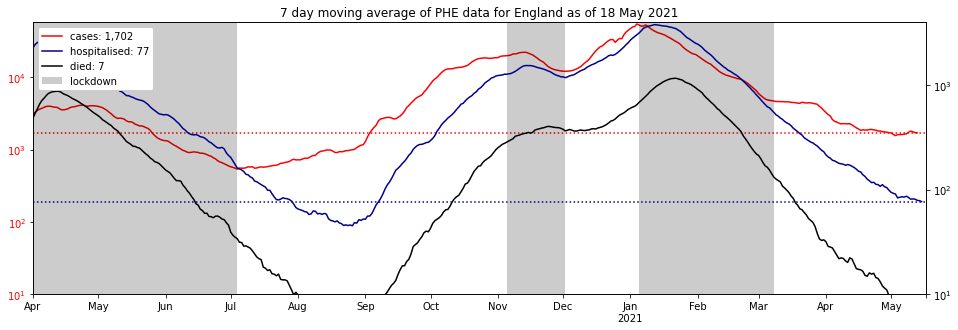

In [5]:
plot_summary(earliest_date='2020-04-01', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

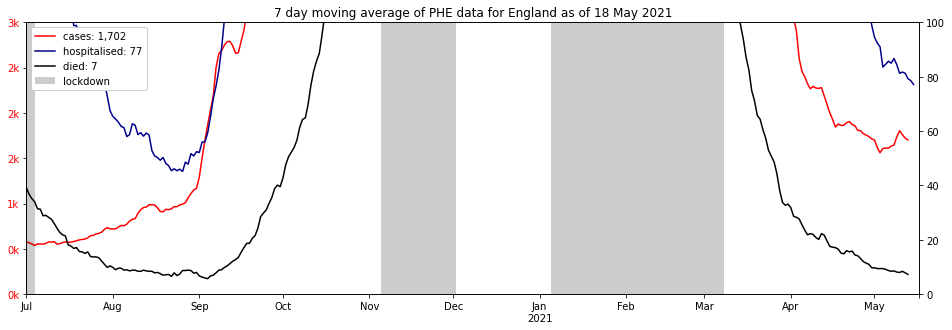

In [6]:
plot_summary(earliest_date='2020-07-01', show_latest=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=3_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=100)

In [7]:
vaccination_changes()

,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
England,17 May 21,"+17,382,651","+30,729,420","+17,382,651","+210,442","+85,946","+210,442"
Northern Ireland,17 May 21,"+567,117","+1,000,928","+567,117","+7,890","+3,323","+7,890"
Scotland,17 May 21,"+1,669,469","+3,045,152","+1,669,469","+30,933","+9,362","+30,933"
Wales,17 May 21,"+927,215","+2,035,905","+927,215","+9,784","+8,102","+9,784"


,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,17382651.0,30729420.0,13346769.0,56286961,30.882198,23.712009,45.405793
1,Northern Ireland,N92000002,567117.0,1000928.0,433811.0,1893667,29.948085,22.908516,47.143400
2,Scotland,S92000003,1669469.0,3045152.0,1375683.0,5463300,30.557886,25.180440,44.261673
3,Wales,W92000004,927215.0,2035905.0,1108690.0,3152879,29.408518,35.164369,35.427113


'partial: 36,811,405 (55.1%), full: 20,546,452'

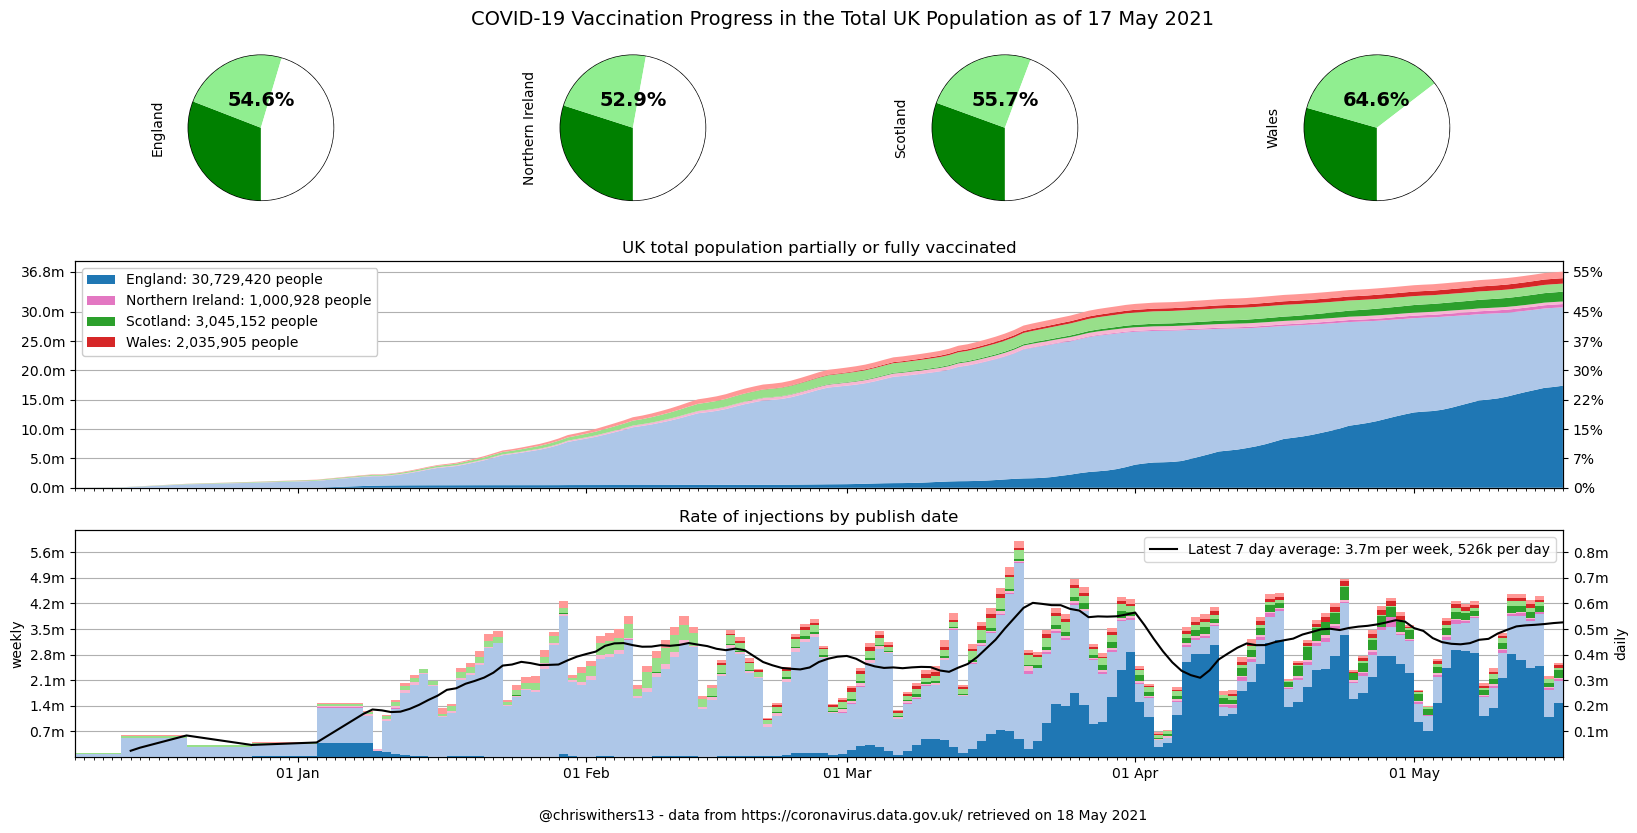

In [8]:
results = vaccination_dashboard(show_partial=True)
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

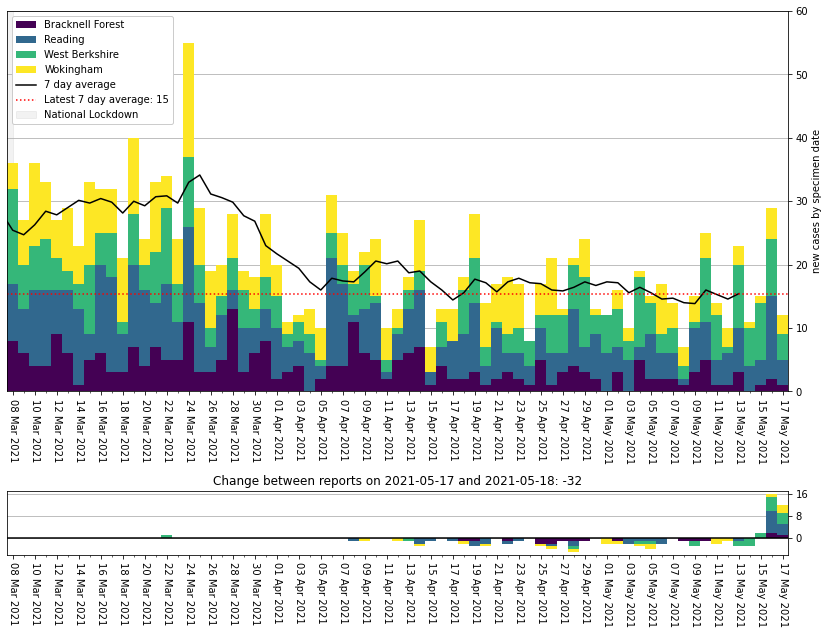

In [9]:
plot_areas(for_date, areas=my_areas, earliest=lockdown3[1], ylim=60)

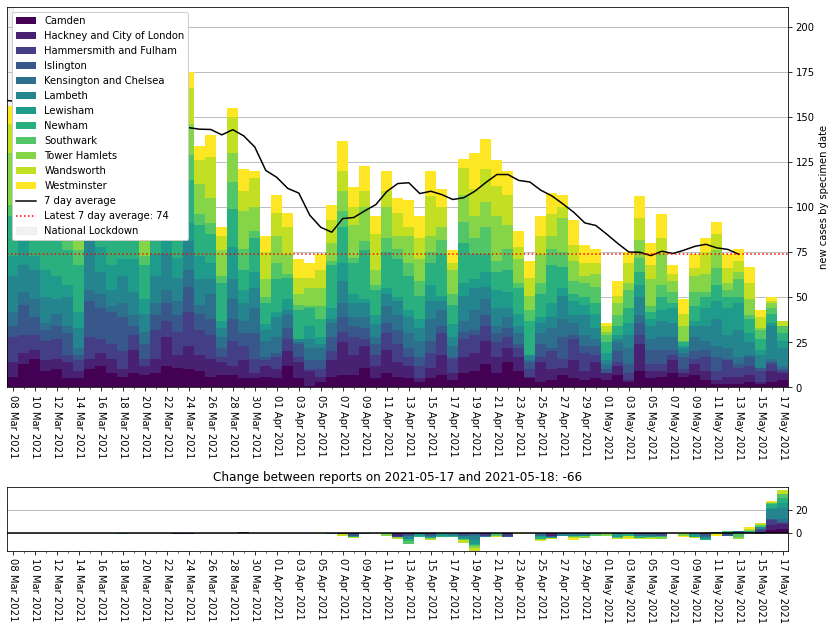

In [10]:
plot_areas(for_date, areas=london_areas, earliest=lockdown3[1])

In [11]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000001,Bolton,298.382890,858.0,2021-05-17
E06000008,Blackburn with Darwen,152.308679,228.0,2021-05-17
E06000055,Bedford,114.835076,199.0,2021-05-17
S12000011,East Renfrewshire,97.351617,93.0,2021-05-17
S12000049,Glasgow City,94.610816,599.0,2021-05-17
N09000005,Derry City and Strabane,93.863198,142.0,2021-05-17
E08000034,Kirklees,67.305309,296.0,2021-05-17
E07000117,Burnley,52.856500,47.0,2021-05-17
N09000009,Mid Ulster,49.822256,74.0,2021-05-17


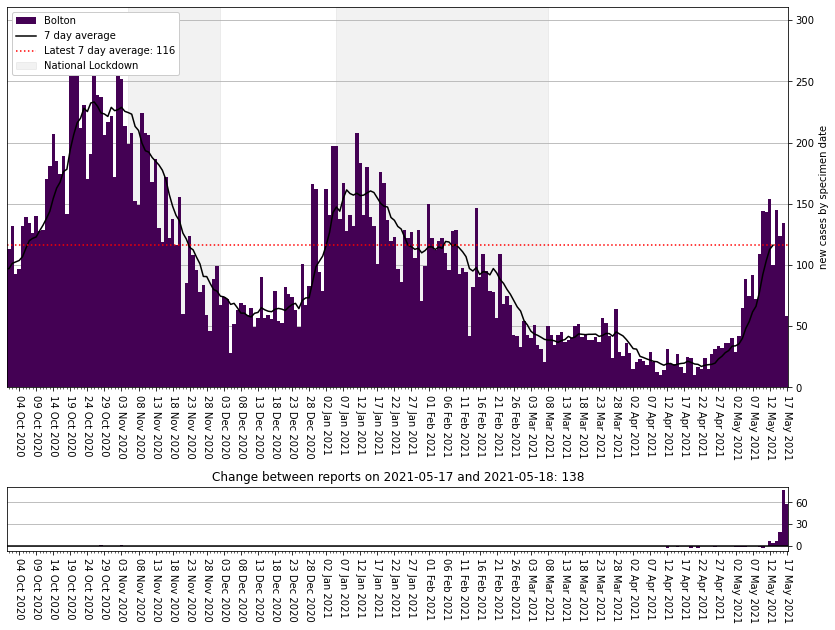

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000001,Bolton,298.382890,858.0,2021-05-17
S12000049,Glasgow City,94.610816,599.0,2021-05-17
E08000034,Kirklees,67.305309,296.0,2021-05-17
E08000035,Leeds,34.672359,275.0,2021-05-17
E06000008,Blackburn with Darwen,152.308679,228.0,2021-05-17
E08000019,Sheffield,34.025644,199.0,2021-05-17
E06000055,Bedford,114.835076,199.0,2021-05-17
E08000003,Manchester,35.633020,197.0,2021-05-17
E08000032,Bradford,34.088214,184.0,2021-05-17


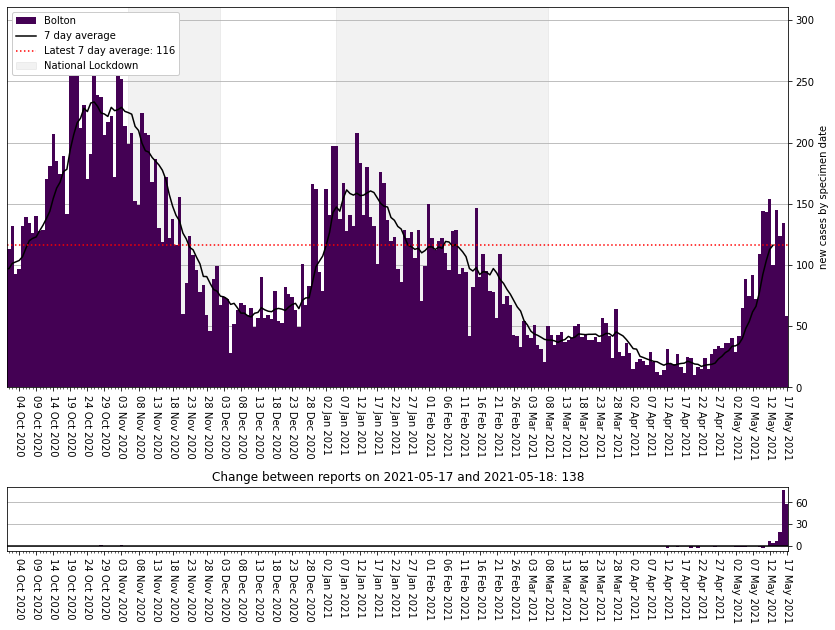

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [16]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 0.6
phe_max = 0.25

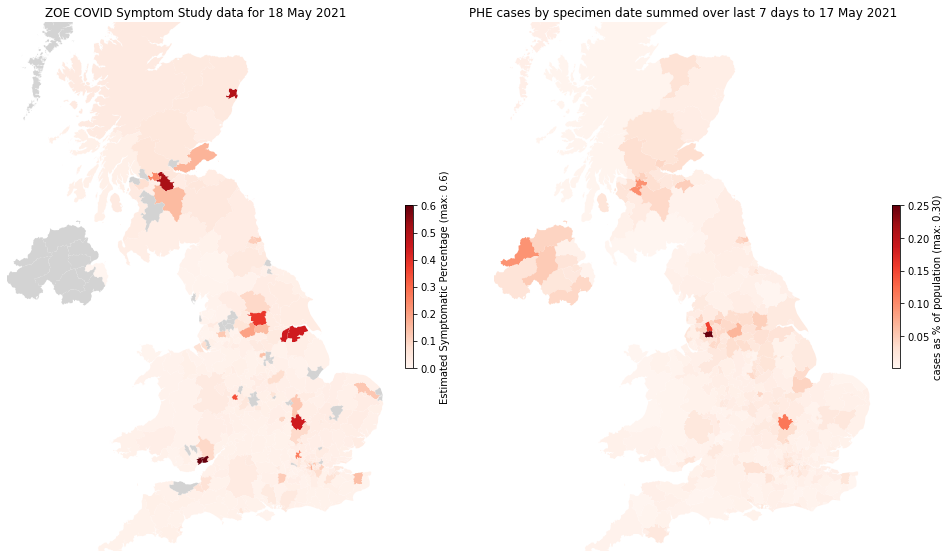

In [17]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [18]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...